# Bayesian Network:
*    Its a directed acyclic graph in which each edge corresponds to a conditional
dependency, and each node corresponds to a unique random variable.
*    Bayesian network consists of two major parts: 
        `directed acyclic graph` and   ` set of conditional probability distributions`
        1. The directed acyclic graph is a set of random variables represented by nodes.
        2. The conditional probability distribution of a node (random variable) is defined for every
possible outcome of the preceding causal node(s).


# Implementation of Bayesian Belief Network:

## Installing pgmpy (Probabilistic Graphical Models using Python)

`!pip install pgmpy`


> `pgmpy` is a pure python implementation for Bayesian Networks with a focus on modularity and extensibility i.e A library for Probabilistic Graphical Models



In [ ]:
!pip install pgmpy

## Dataset Info:


1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
        Value 0: typical angina
        Value 1: atypical angina
        Value 2: non-anginal pain
        Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
        Value 0: upsloping
        Value 1: flat
        Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: `0 = normal`,  `1 = fixed defect`, `2 = reversable defect`
14. condition: `0 = no disease`, `1 = disease`

## Importing the libraries

In [74]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from IPython.display import Image

## 1. Using dataset:

In [185]:
# reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Ajith-Kumar-G/Clg-Labs/main/VI%20sem/ML_LAB/LAB%207/data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


### EDA

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [65]:
df.corr()["condition"]

age          0.227075
sex          0.278467
cp           0.408945
trestbps     0.153490
chol         0.080285
fbs          0.003167
restecg      0.166343
thalach     -0.423817
exang        0.421355
oldpeak      0.424052
slope        0.333049
ca           0.463189
thal         0.520516
condition    1.000000
Name: condition, dtype: float64

In [47]:
import plotly.express as px
fig = px.histogram(df, x="cp", color='cp',pattern_shape="condition", title="Chest pain type VS Heart Disease")
fig.show()

In [50]:
fig = px.histogram(df, x="thal", color='thal',pattern_shape="condition", title="Thal VS Heart Disease",text_auto=True)
fig.show()

### Modeling

In [54]:
#Model Bayesian Network
Model=BayesianNetwork([
                     ('age','trestbps'),('age','fbs'),
                     ('sex','trestbps'),
                     ('exang','trestbps'),
                     ('thal','condition'),
                     ('trestbps','condition'),
                     ('fbs','condition'),
                     ('condition','restecg'),('condition','thalach'),('condition','chol')
                     ])

def HeartDisease(x):
    prediction =  "No Heart Disease" if x[0] > x[1]  else "Heart Disease"
    print("\n Its predicted that the patient has " + prediction)


In [55]:
#Learning CPDs using Maximum Likelihood Estimators
print('\n Learning CPD using Maximum likelihood estimators')
Model.fit(df,estimator=MaximumLikelihoodEstimator)


 Learning CPD using Maximum likelihood estimators


In [56]:
# Inferencing with Bayesian Network
HeartDisease_infer = VariableElimination(Model)

In [57]:
#computing the Probability of HeartDisease given Age
print('\n 1. Probability of HeartDisease given Age=30')
q=HeartDisease_infer.query(variables=['condition'],evidence={'age':28})
print(q)
HeartDisease(q.values)


 1. Probability of HeartDisease given Age=30


/usr/local/lib/python3.7/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:537: UserWarning:

Found unknown state name. Trying to switch to using all state names as state numbers



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------+------------------+
| condition    |   phi(condition) |
+==============+==================+
| condition(0) |           0.6060 |
+--------------+------------------+
| condition(1) |           0.3940 |
+--------------+------------------+

 Its predicted that the patient has No Heart Disease


In [63]:
#computing the Probability of HeartDisease given cholesterol
print('\n 2. Probability of HeartDisease given cholesterol=100')
q=HeartDisease_infer.query(variables=['condition'],evidence={'chol':100})
print(q)
HeartDisease(q.values)


 2. Probability of HeartDisease given cholesterol=100


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

+--------------+------------------+
| condition    |   phi(condition) |
+==============+==================+
| condition(0) |           0.0000 |
+--------------+------------------+
| condition(1) |           1.0000 |
+--------------+------------------+

 Its predicted that the patient has Heart Disease


In [64]:
#computing the Probability of HeartDisease given cholesterol,exang, thalach
print('\n 3. Probability of HeartDisease given cholesterol, thal')
q=HeartDisease_infer.query(variables=['condition'],evidence={'chol':282,'thal':2})
print(q)
HeartDisease(q.values)


 3. Probability of HeartDisease given cholesterol, thal


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+--------------+------------------+
| condition    |   phi(condition) |
+==============+==================+
| condition(0) |           0.0000 |
+--------------+------------------+
| condition(1) |           1.0000 |
+--------------+------------------+

 Its predicted that the patient has Heart Disease


## 2. Using CP tables: Burglary Model




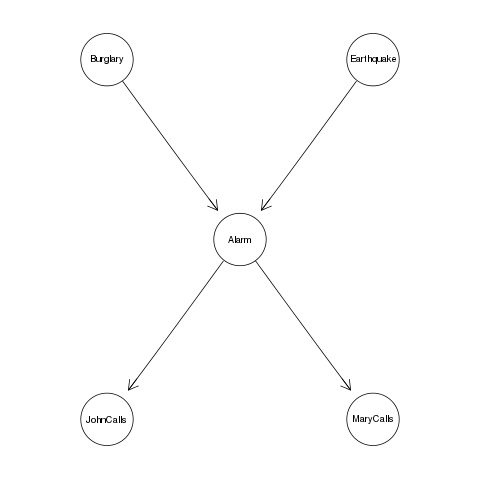

In [186]:
Image("https://raw.githubusercontent.com/Ajith-Kumar-G/Clg-Labs/main/VI%20sem/ML_LAB/LAB%207/image.png")

In [161]:
EQ_model = BayesianNetwork(
    [
        ("Burglary", "Alarm"),
        ("Earthquake", "Alarm"),
        ("Alarm", "JohnCalls"),
        ("Alarm", "MaryCalls"),
    ]
)

In [162]:
cpd_B = TabularCPD(variable="Burglary", variable_card=2, values=[[0.002], [1 - 0.002]])

cpd_E = TabularCPD(variable="Earthquake", variable_card=2, values=[[0.001], [1 - 0.001]])

cpd_A = TabularCPD(
    variable="Alarm",
    variable_card=2,
    values=[[0.95, 0.94, 0.29, 0.001], [1 - 0.95, 1 - 0.94, 1 - 0.29, 1 - 0.001]],
    evidence=["Burglary", "Earthquake"],
    evidence_card=[2, 2],
)

cpd_J = TabularCPD(
    variable="JohnCalls",
    variable_card=2,
    values=[[0.90, 0.05], [0.10, 0.95]],
    evidence=["Alarm"],
    evidence_card=[2],
)

cpd_M = TabularCPD(
    variable="MaryCalls",
    variable_card=2,
    values=[[0.70, 0.01], [0.30,0.99]],
    evidence=["Alarm"],
    evidence_card=[2],
)

In [163]:
# Associating the parameters with the model structure.
EQ_model.add_cpds(cpd_B, cpd_E, cpd_A, cpd_J, cpd_M)

# Checking if the cpds are valid for the model.
EQ_model.check_model()

True

In [164]:
print(EQ_model.get_cpds("Burglary"))
print(EQ_model.get_cpds("Earthquake"))
print(EQ_model.get_cpds("Alarm"))
print(EQ_model.get_cpds("JohnCalls"))
print(EQ_model.get_cpds("MaryCalls"))
print("Nodes in the model:", EQ_model.nodes())

+-------------+-------+
| Burglary(0) | 0.002 |
+-------------+-------+
| Burglary(1) | 0.998 |
+-------------+-------+
+---------------+-------+
| Earthquake(0) | 0.001 |
+---------------+-------+
| Earthquake(1) | 0.999 |
+---------------+-------+
+------------+----------------------+-----+---------------+---------------+
| Burglary   | Burglary(0)          | ... | Burglary(1)   | Burglary(1)   |
+------------+----------------------+-----+---------------+---------------+
| Earthquake | Earthquake(0)        | ... | Earthquake(0) | Earthquake(1) |
+------------+----------------------+-----+---------------+---------------+
| Alarm(0)   | 0.95                 | ... | 0.29          | 0.001         |
+------------+----------------------+-----+---------------+---------------+
| Alarm(1)   | 0.050000000000000044 | ... | 0.71          | 0.999         |
+------------+----------------------+-----+---------------+---------------+
+--------------+----------+----------+
| Alarm        | Alarm(0) |

In [165]:
# Check for d-separation between variables
print(EQ_model.is_dconnected("Burglary", "Earthquake"))
print(EQ_model.is_dconnected("Burglary", "Earthquake", observed=["Alarm"]))

False
True


In [177]:
EQ_infer = VariableElimination(EQ_model)

In [180]:
# Query 1
q = EQ_infer.query(variables=["MaryCalls"], evidence={"Alarm":0})
print(q)
output = "Yes " if q.values[0] > q.values[1] else "No"
print('\n' +output)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------+------------------+
| MaryCalls    |   phi(MaryCalls) |
+==============+==================+
| MaryCalls(0) |           0.7000 |
+--------------+------------------+
| MaryCalls(1) |           0.3000 |
+--------------+------------------+

Yes 


In [183]:
# Query 2
q = EQ_infer.query(variables=["Burglary"], evidence={"MaryCalls":0,"JohnCalls":0})
print(q)
output = "Yes " if q.values[0] > q.values[1] else "No"
print('\n' +output)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+-------------+-----------------+
| Burglary    |   phi(Burglary) |
+=============+=================+
| Burglary(0) |          0.4751 |
+-------------+-----------------+
| Burglary(1) |          0.5249 |
+-------------+-----------------+

No


In [184]:
# Query 2
q = EQ_infer.query(variables=["Alarm"], evidence={"MaryCalls":0,"JohnCalls":0})
print(q)
output = "Yes " if q.values[0] > q.values[1] else "No"
print('\n' +output)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.8001 |
+----------+--------------+
| Alarm(1) |       0.1999 |
+----------+--------------+

Yes 
